# Name: Ayush Kumar

# Rain Predictions 

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Loading Dataset

In [2]:
rain = pd.read_csv('weatherAUS.csv')
rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Chechking Data

In [3]:
print(f'The number of rows are {rain.shape[0] } and the number of columns are {rain.shape[1]}')

The number of rows are 145460 and the number of columns are 23


In [4]:
rain.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<AxesSubplot:>

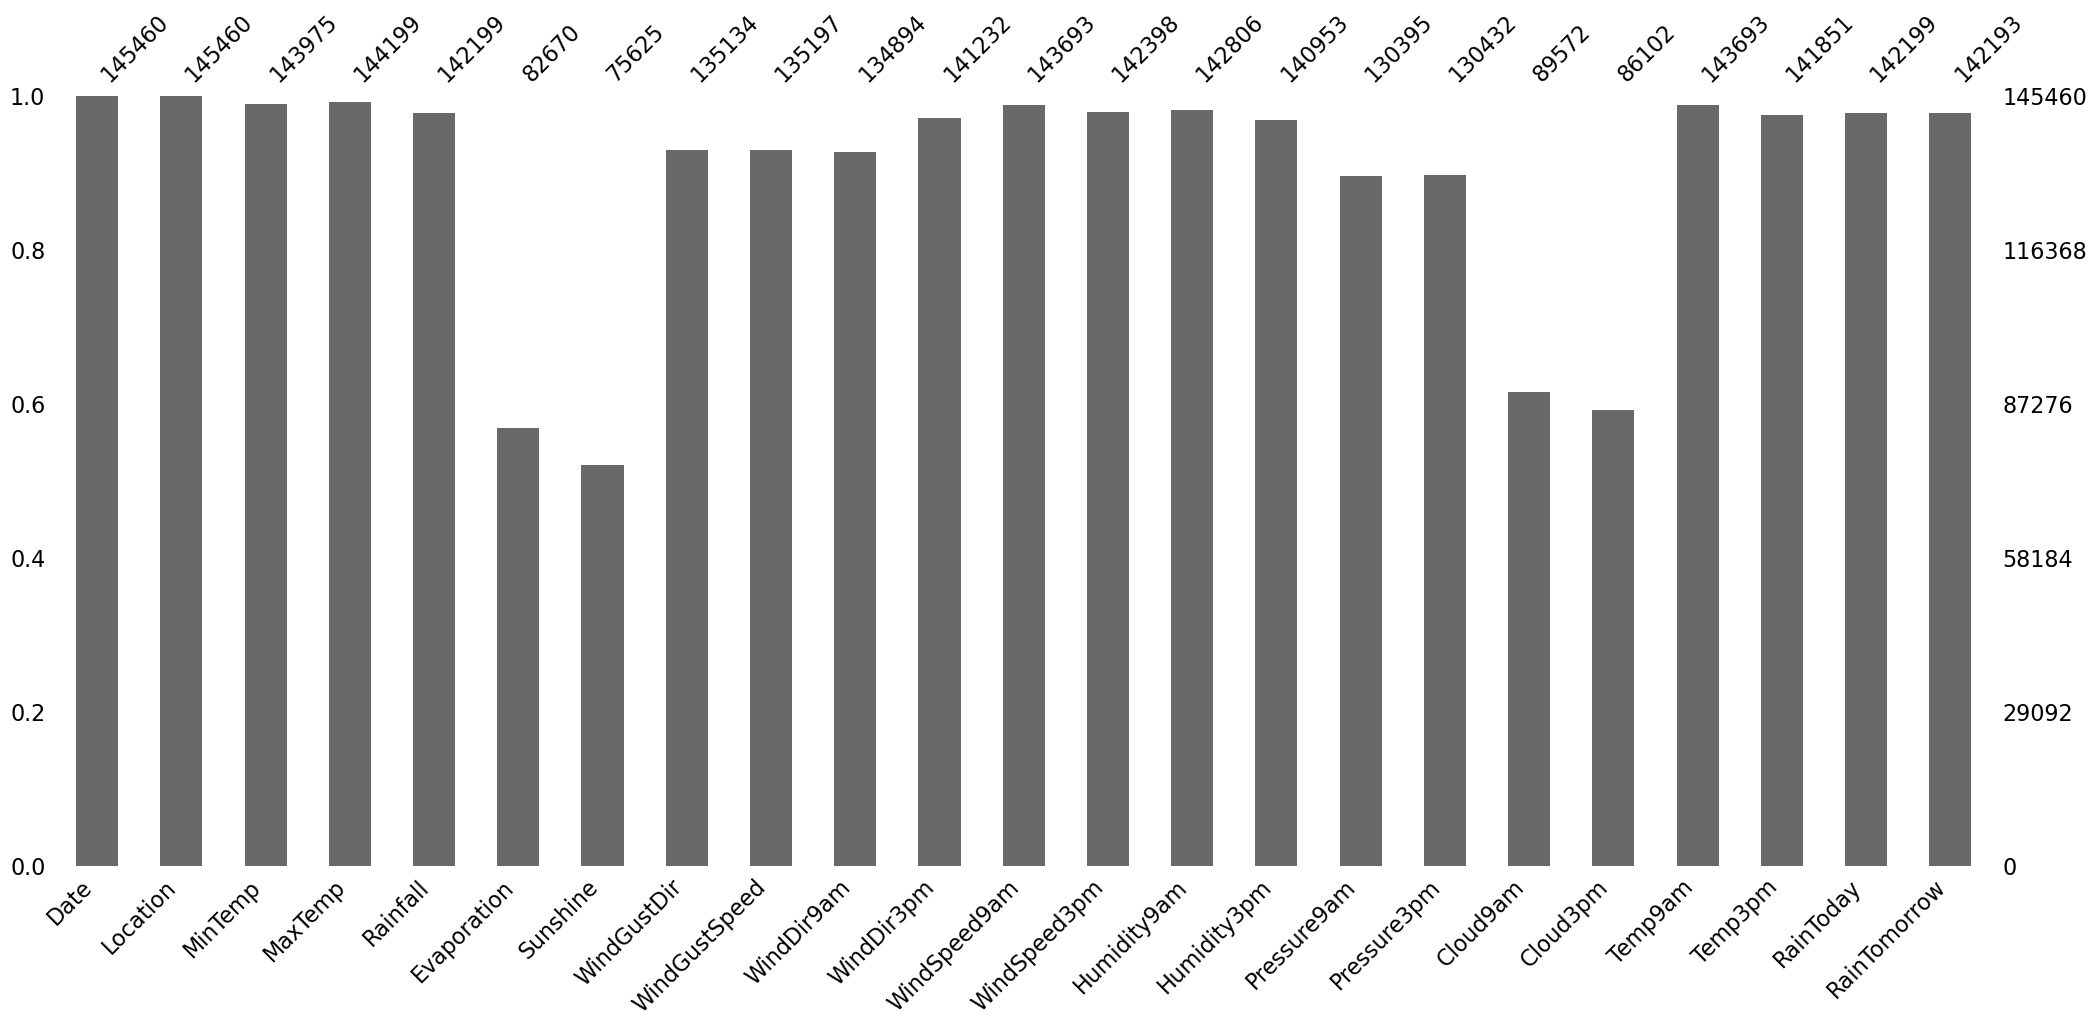

In [5]:
import missingno as msno
msno.bar(rain)

In [6]:
categorical_col, contin_val=[],[]

for i in rain.columns:
    
    if rain[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [7]:
rain.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
rain.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Correlation Plot

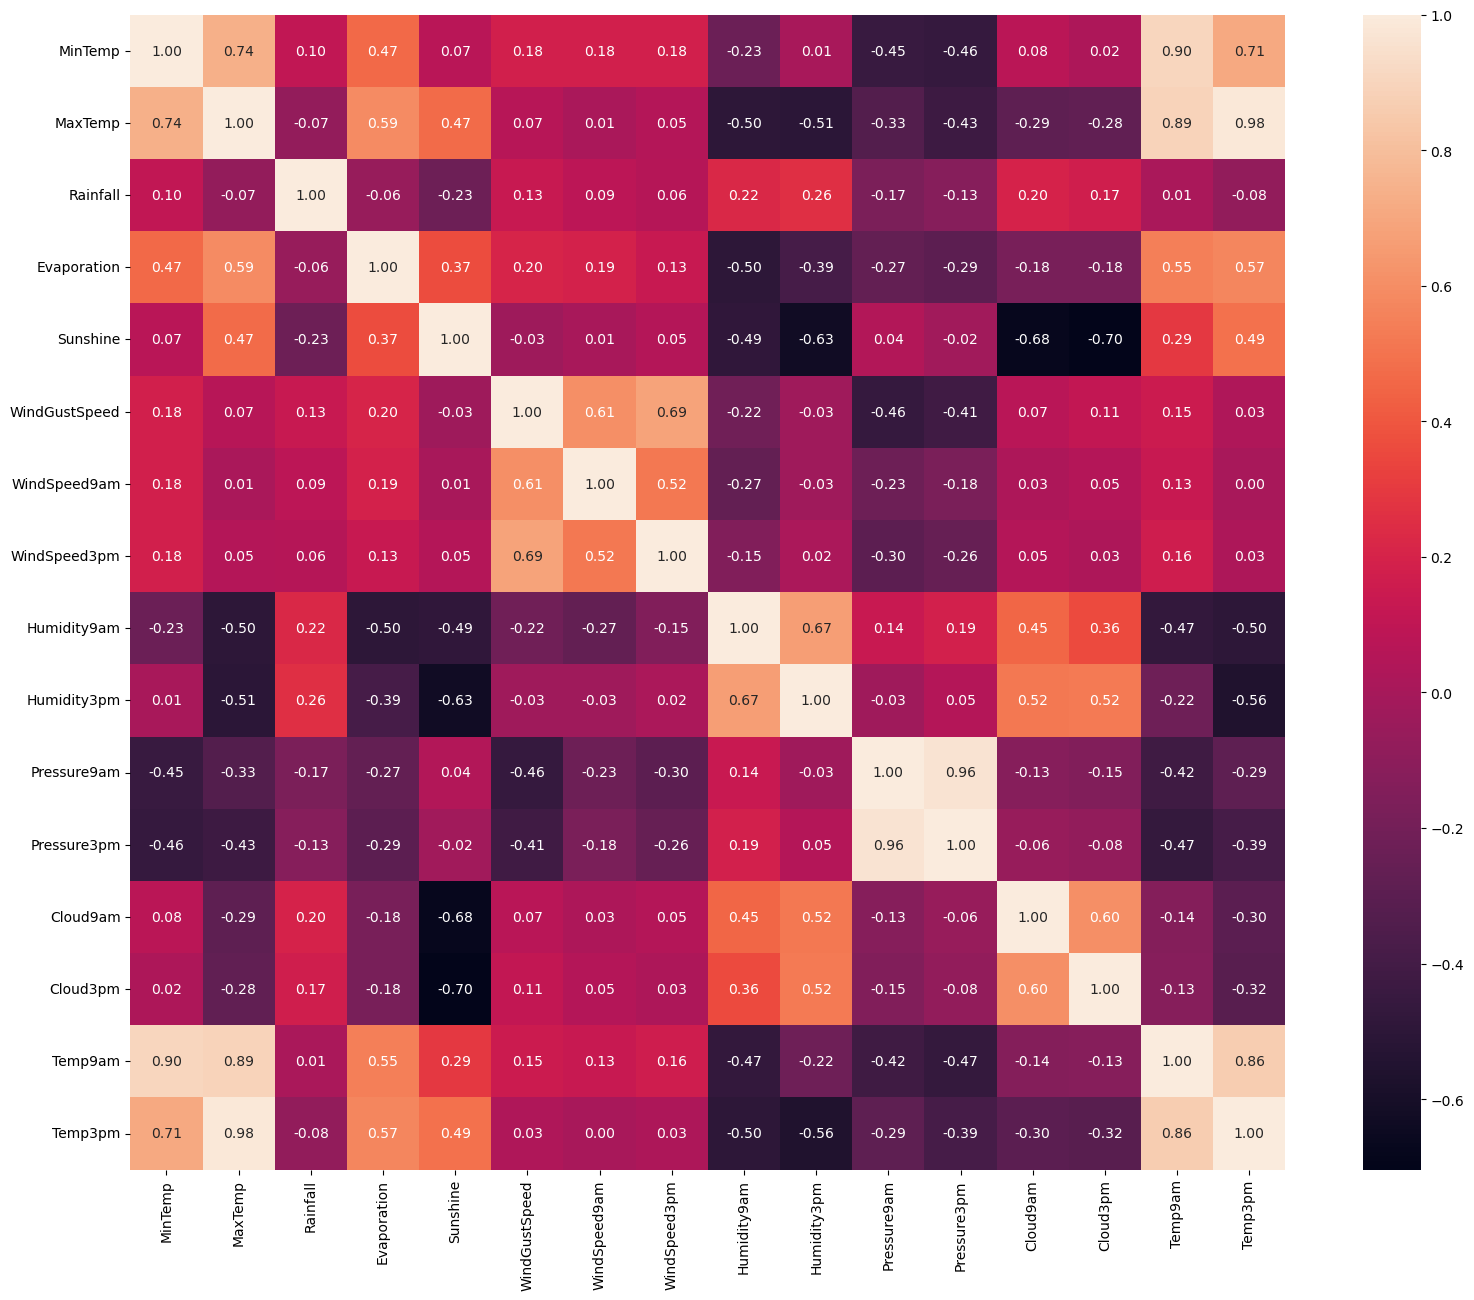

In [9]:
plt.figure(figsize=(20,15))
ax = sns.heatmap(rain.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

# Data processing

In [10]:
rain['RainTomorrow'] = rain['RainTomorrow'].map({'Yes': 1, 'No': 0})
rain['RainToday'] = rain['RainToday'].map({'Yes': 1, 'No': 0})

print(rain.RainToday)
print(rain.RainTomorrow)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: RainToday, Length: 145460, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    NaN
Name: RainTomorrow, Length: 145460, dtype: float64


In [11]:
(rain.isnull().sum()/len(rain))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [12]:
rain['MinTemp']=rain['MinTemp'].fillna(rain['MinTemp'].mean())
rain['MaxTemp']=rain['MinTemp'].fillna(rain['MaxTemp'].mean())
rain['Rainfall']=rain['Rainfall'].fillna(rain['Rainfall'].mean())
rain['Evaporation']=rain['Evaporation'].fillna(rain['Evaporation'].mean())
rain['Sunshine']=rain['Sunshine'].fillna(rain['Sunshine'].mean())
rain['WindGustSpeed']=rain['WindGustSpeed'].fillna(rain['WindGustSpeed'].mean())
rain['WindSpeed9am']=rain['WindSpeed9am'].fillna(rain['WindSpeed9am'].mean())
rain['WindSpeed3pm']=rain['WindSpeed3pm'].fillna(rain['WindSpeed3pm'].mean())
rain['Humidity9am']=rain['Humidity9am'].fillna(rain['Humidity9am'].mean())
rain['Humidity3pm']=rain['Humidity3pm'].fillna(rain['Humidity3pm'].mean())
rain['Pressure9am']=rain['Pressure9am'].fillna(rain['Pressure9am'].mean())
rain['Pressure3pm']=rain['Pressure3pm'].fillna(rain['Pressure3pm'].mean())
rain['Cloud9am']=rain['Cloud9am'].fillna(rain['Cloud9am'].mean())
rain['Cloud3pm']=rain['Cloud3pm'].fillna(rain['Cloud3pm'].mean())
rain['Temp9am']=rain['Temp9am'].fillna(rain['Temp9am'].mean())
rain['Temp3pm']=rain['Temp3pm'].fillna(rain['Temp3pm'].mean())

In [13]:
rain['RainToday']=rain['RainToday'].fillna(rain['RainToday'].mode()[0])
rain['RainTomorrow']=rain['RainTomorrow'].fillna(rain['RainTomorrow'].mode()[0])

In [14]:
rain['WindDir9am'] = rain['WindDir9am'].fillna(rain['WindDir9am'].mode()[0])
rain['WindGustDir'] = rain['WindGustDir'].fillna(rain['WindGustDir'].mode()[0])
rain['WindDir3pm'] = rain['WindDir3pm'].fillna(rain['WindDir3pm'].mode()[0])

In [15]:
(rain.isnull().sum()/len(rain))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

<AxesSubplot:>

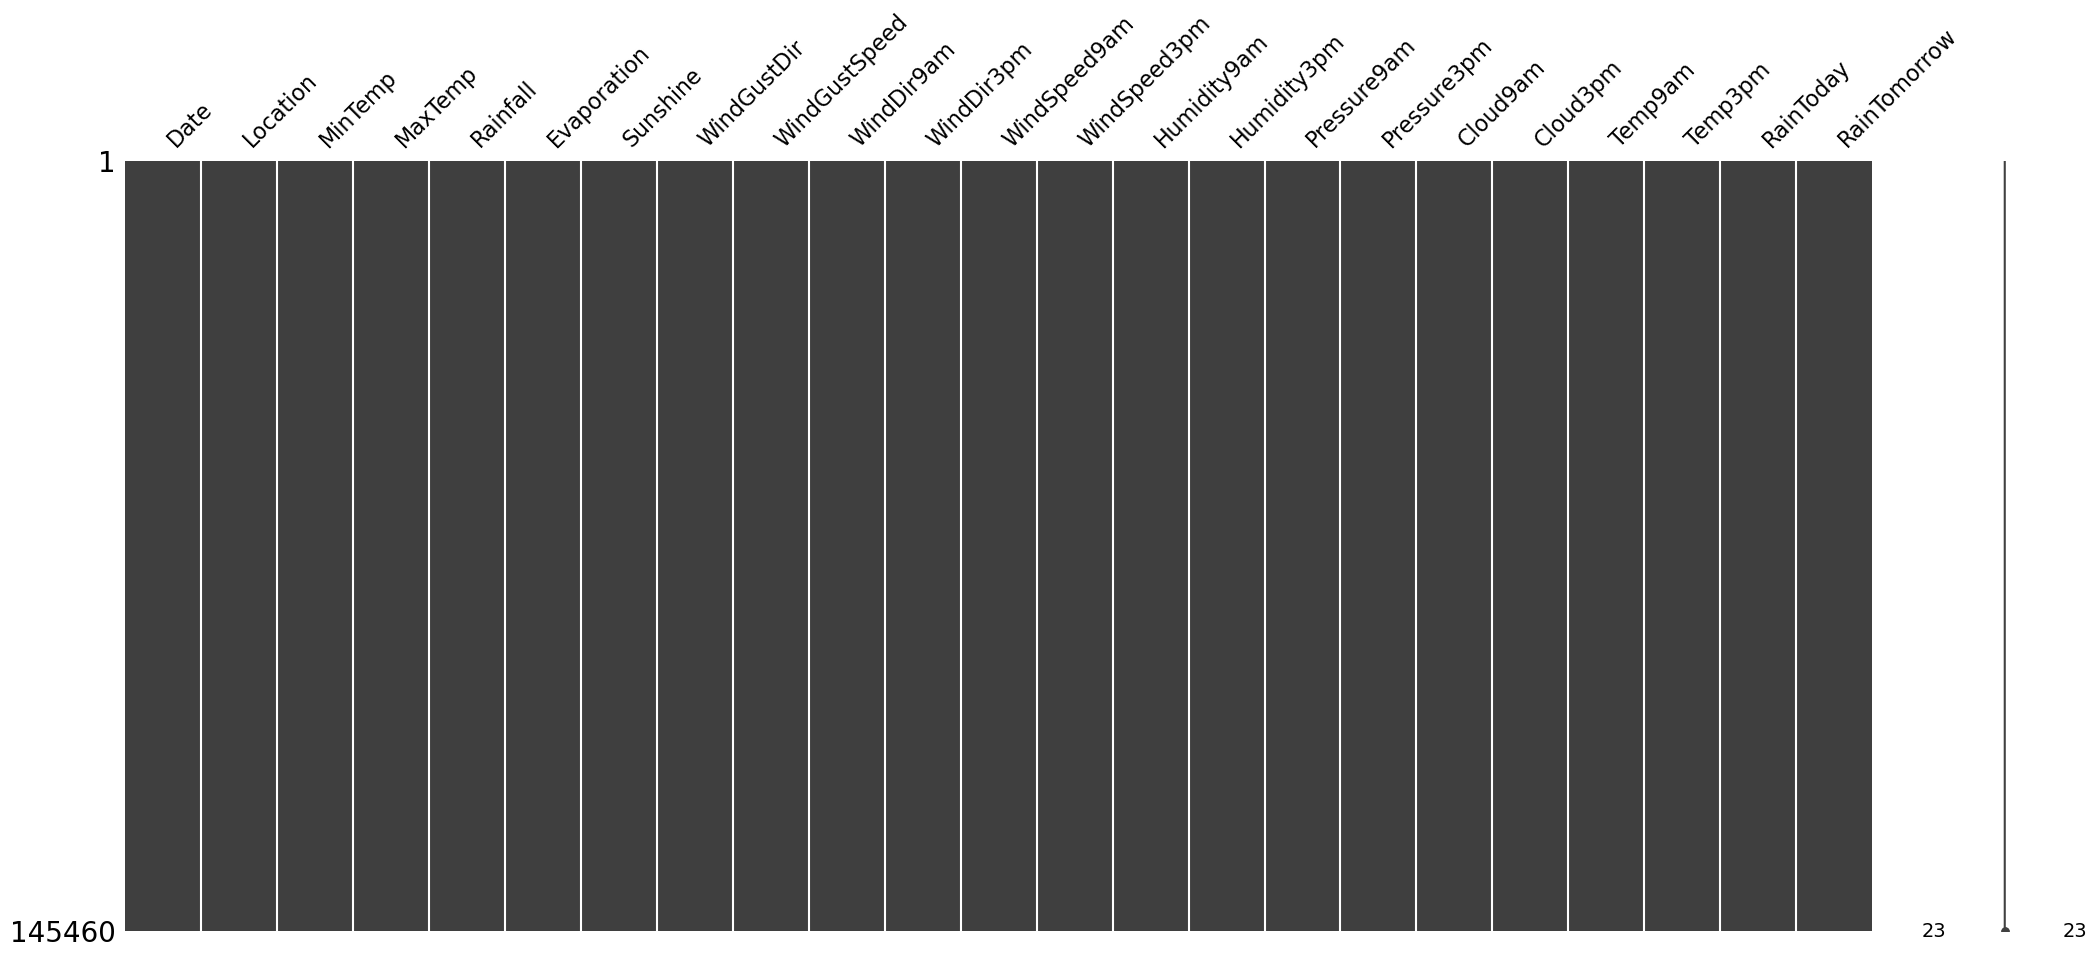

In [16]:
msno.matrix(rain)

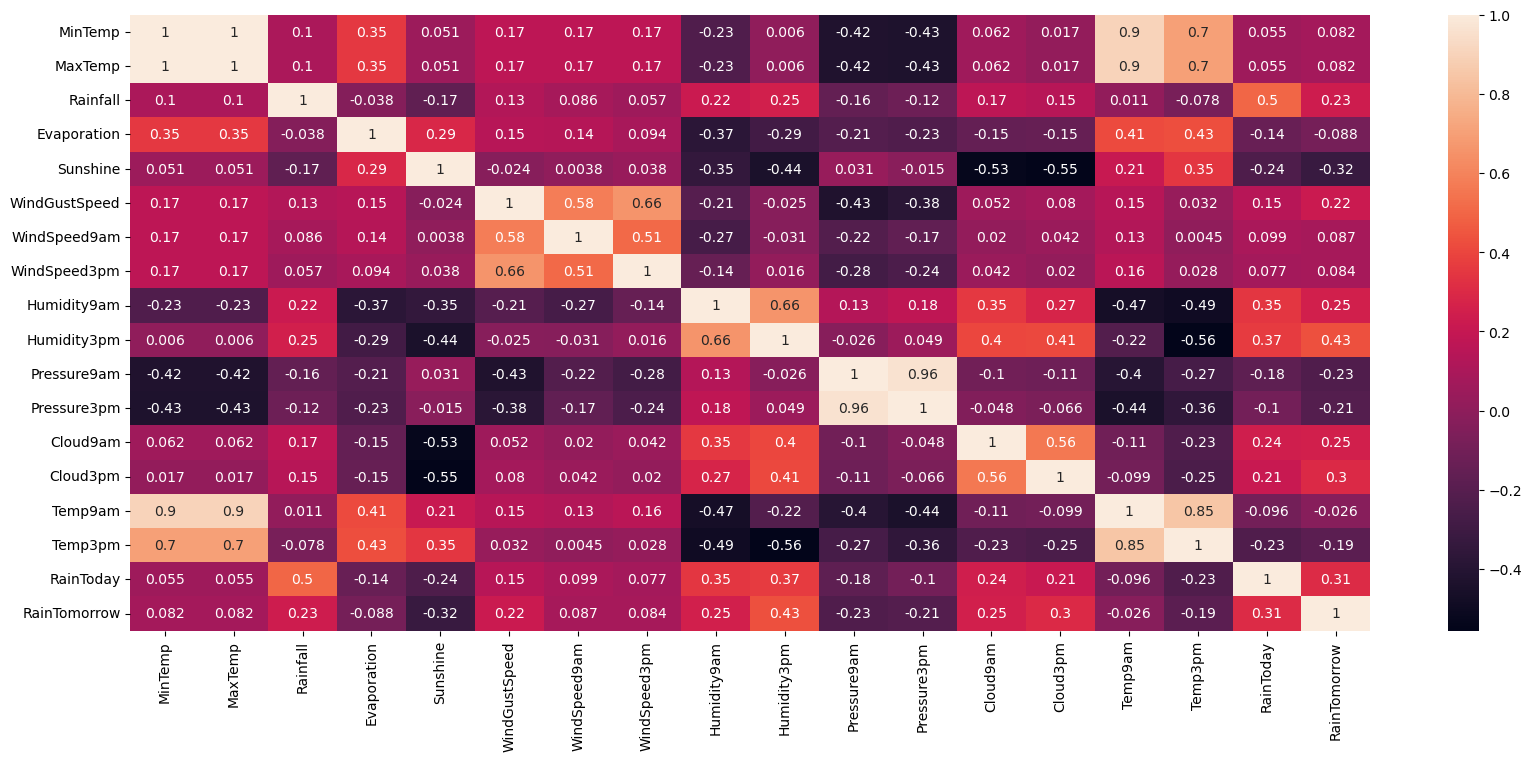

In [17]:
corr = rain.corr()
fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(data=corr, ax=ax, annot=True)
plt.show()

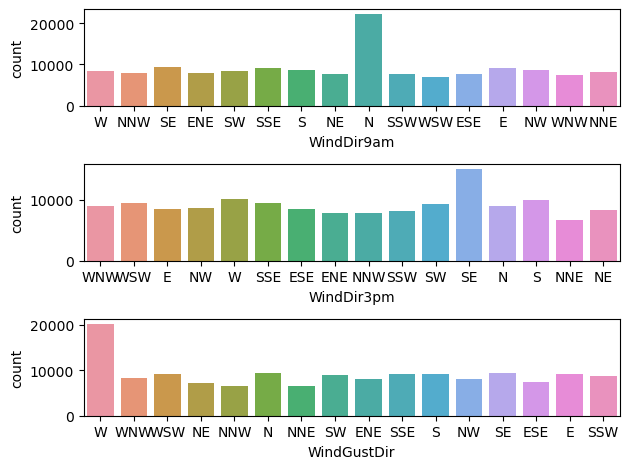

<Figure size 1000x1000 with 0 Axes>

In [18]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(10,10))

sns.countplot(data=rain,x='WindDir9am',ax=ax[0])
sns.countplot(data=rain,x='WindDir3pm',ax=ax[1])
sns.countplot(data=rain,x='WindGustDir',ax=ax[2])
fig.tight_layout()

In [19]:
rain=rain.drop(['Date','Temp3pm','Temp9am','Humidity9am','Evaporation','Sunshine','Pressure9am','Pressure3pm'],axis=1)
rain.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [20]:
le = preprocessing.LabelEncoder()
rain['Location'] = le.fit_transform(rain['Location'])
rain['WindDir9am'] = le.fit_transform(rain['WindDir9am'])
rain['WindDir3pm'] = le.fit_transform(rain['WindDir3pm'])
rain['WindGustDir'] = le.fit_transform(rain['WindGustDir'])

C:\Users\Ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ayush\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Ayush\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ayush\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

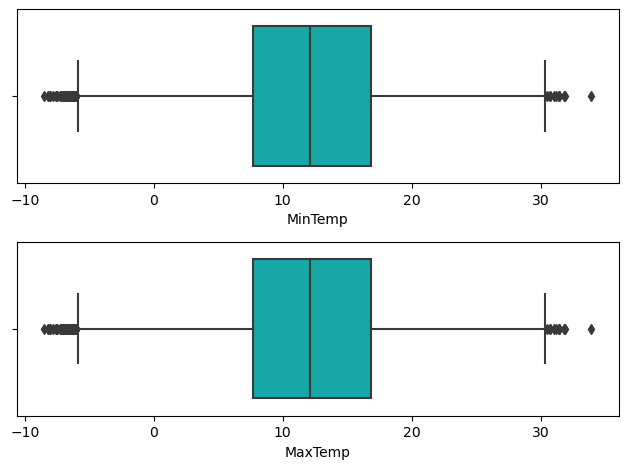

<Figure size 1000x1000 with 0 Axes>

In [21]:
fig, ax =plt.subplots(2,1)
plt.figure(figsize=(10,10))
sns.boxplot(rain['MinTemp'],orient='v',color='c',ax=ax[0])
sns.boxplot(rain['MaxTemp'],orient='v',color='c',ax=ax[1])
fig.tight_layout()

In [22]:
from scipy import stats
print('Shape of DataFrame Before Removing Outliers', rain.shape )
rain=rain[(np.abs(stats.zscore(rain)) < 3).all(axis=1)]
print('Shape of DataFrame After Removing Outliers', rain.shape )

Shape of DataFrame Before Removing Outliers (145460, 15)
Shape of DataFrame After Removing Outliers (139959, 15)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Location'),
  Text(1, 0, 'MinTemp'),
  Text(2, 0, 'MaxTemp'),
  Text(3, 0, 'Rainfall'),
  Text(4, 0, 'WindGustDir'),
  Text(5, 0, 'WindGustSpeed'),
  Text(6, 0, 'WindDir9am'),
  Text(7, 0, 'WindDir3pm'),
  Text(8, 0, 'WindSpeed9am'),
  Text(9, 0, 'WindSpeed3pm'),
  Text(10, 0, 'Humidity3pm'),
  Text(11, 0, 'Cloud9am'),
  Text(12, 0, 'Cloud3pm'),
  Text(13, 0, 'RainToday'),
  Text(14, 0, 'RainTomorrow')])

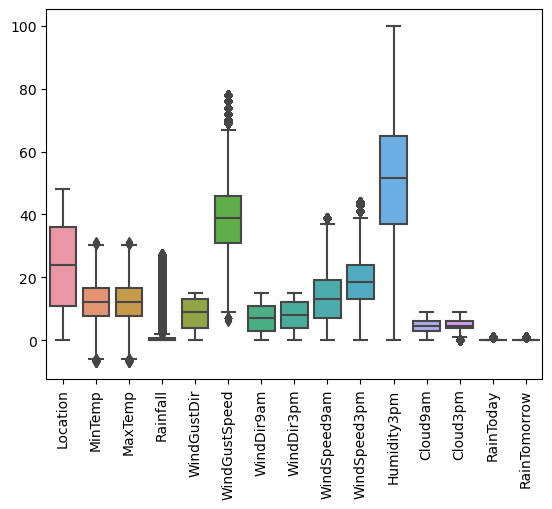

In [23]:
sns.boxplot(data=rain)
plt.xticks(rotation=90)

In [24]:
# Check for any duplicate rows
print("Number of duplicate rows: ", rain[rain.duplicated() == True].shape[0]) 
print(f"\nRows in original Dataframe: {rain.shape[0]}")

rain = rain.drop_duplicates()
print(f"Dataframe rows after removing duplicates: {rain.shape[0]}")

Number of duplicate rows:  410

Rows in original Dataframe: 139959
Dataframe rows after removing duplicates: 139549


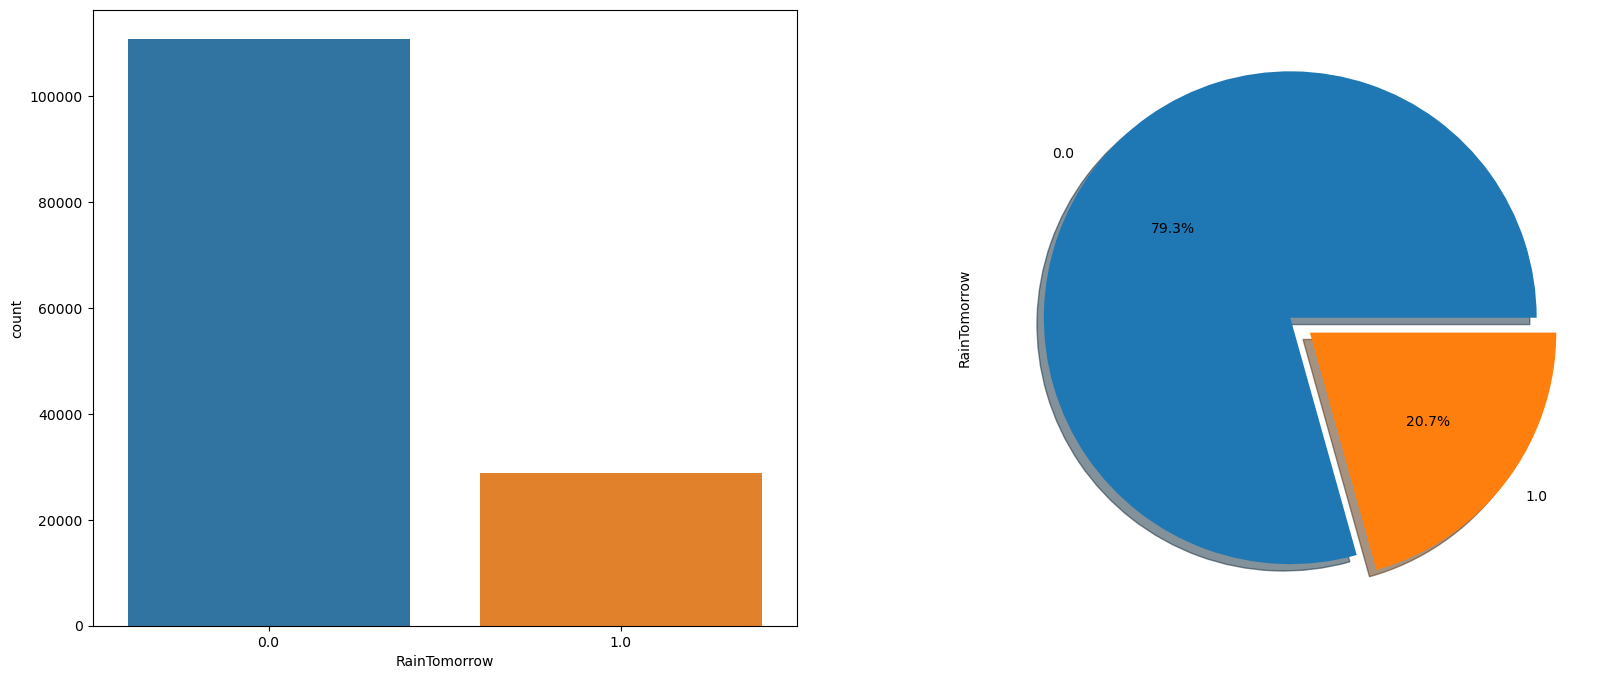

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=rain, x="RainTomorrow", ax=ax[0])
rain["RainTomorrow"].value_counts().plot.pie(ax=ax[1], shadow=True, explode=[0, 0.1], autopct="%1.1f%%")

plt.show()

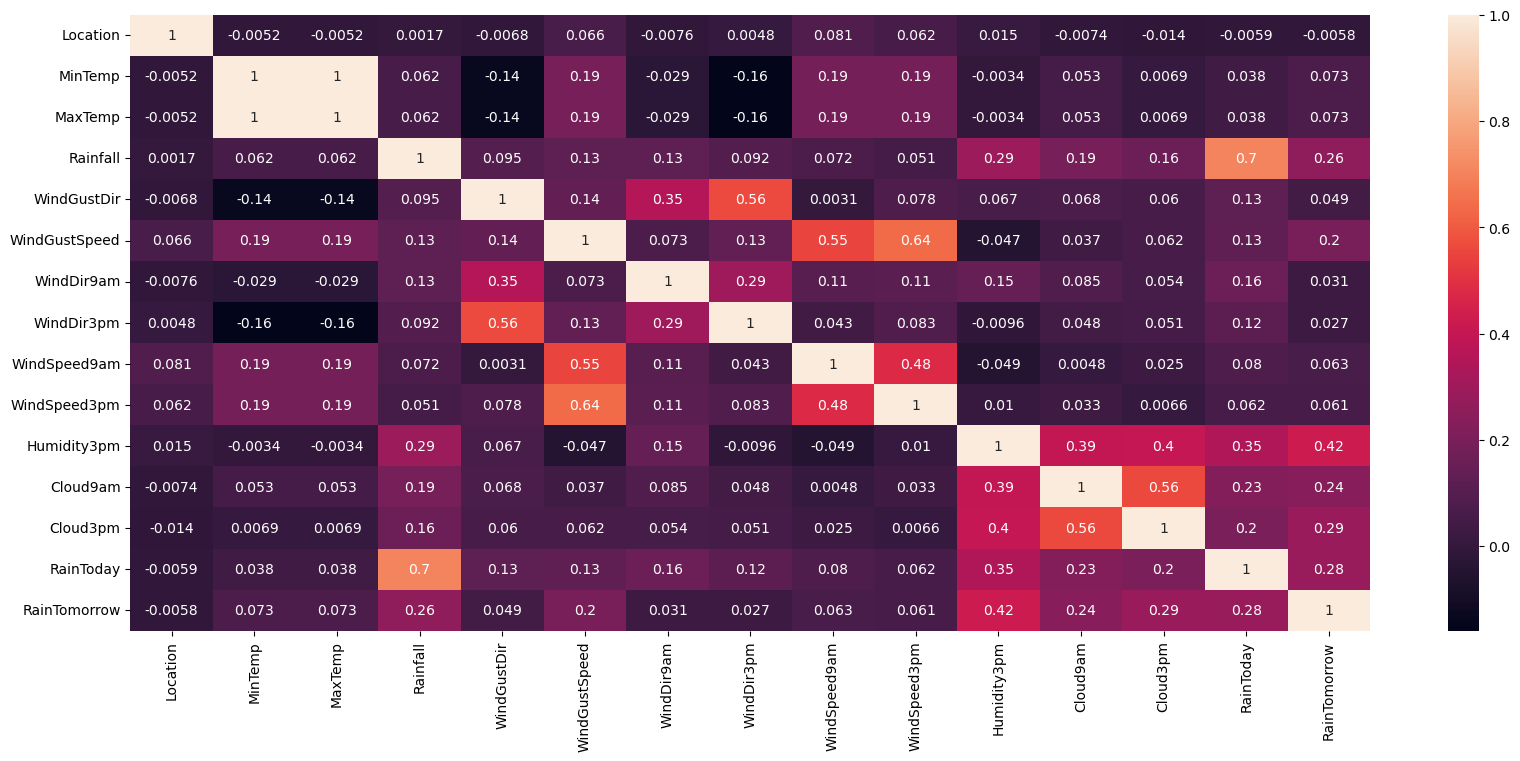

In [26]:
corr = rain.corr()
fig, ax = plt.subplots(figsize=(20, 8))

sns.heatmap(data=corr, ax=ax, annot=True)
plt.show()

# Spliting data for model

In [27]:
x_train, x_test, y_train, y_test = train_test_split(rain.iloc[:,:-1], rain.iloc[:,-1], test_size=0.25, random_state=42)

In [28]:
x_train

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity3pm,Cloud9am,Cloud3pm,RainToday
37442,42,4.9,4.9,0.000000,3,33.0,2,5,15.0,19.0,34.0,2.000000,2.00000,0.0
40365,45,5.4,5.4,2.360918,14,35.0,7,13,19.0,7.0,31.0,4.447461,4.50993,0.0
93408,39,23.9,23.9,0.600000,2,50.0,9,2,20.0,31.0,58.0,5.000000,6.00000,0.0
35949,38,18.1,18.1,0.000000,4,57.0,0,4,6.0,37.0,50.0,4.000000,1.00000,0.0
145193,41,18.2,18.2,2.000000,13,65.0,13,13,31.0,41.0,11.0,1.000000,4.50993,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115308,29,14.4,14.4,2.360918,13,39.0,0,14,11.0,20.0,45.0,4.447461,4.50993,0.0
125123,36,3.5,3.5,0.400000,13,37.0,14,15,19.0,15.0,52.0,4.447461,4.50993,0.0
108497,48,11.3,11.3,0.000000,8,31.0,0,11,6.0,15.0,19.0,1.000000,4.50993,0.0
137576,3,12.7,12.7,0.000000,0,33.0,6,8,2.0,11.0,17.0,1.000000,3.00000,0.0


# Decision tree using sklearn library

In [29]:

# Define decision tree classifier model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(x_train, y_train)


# Predict on the test data
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100.0))
print("F1 score: {:.2f}%".format(f1 * 100.0))
print("Precision: {:.2f}%".format(precision * 100.0))
print("Recall: {:.2f}%".format(recall * 100.0))
print("Confusion matrix: \n", conf)



Accuracy: 77.39%
F1 score: 47.80%
Precision: 46.24%
Recall: 49.47%
Confusion matrix: 
 [[23387  4199]
 [ 3690  3612]]


# Randomforest using Sklearn

In [30]:
model = RandomForestClassifier()  
model.fit(x_train, y_train)  
# Predict on the test data

y_pred = model.predict(x_test)

# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100.0))
print("F1 score: {:.2f}%".format(f1 * 100.0))
print("Precision: {:.2f}%".format(precision * 100.0))
print("Recall: {:.2f}%".format(recall * 100.0))
print("Confusion matrix: \n", conf)

Accuracy: 84.99%
F1 score: 55.26%
Precision: 73.45%
Recall: 44.29%
Confusion matrix: 
 [[26417  1169]
 [ 4068  3234]]


# Random Forest using XGBoost

In [31]:

# create xgboost object
params = {
  'colsample_bynode': 0.8,
  'learning_rate': 1,
  'max_depth': 5,
  'num_parallel_tree': 100,
  'objective': 'binary:logistic',
  'subsample': 0.8,
  'tree_method': 'gpu_hist'
}
xgb_model = xgb.XGBClassifier(**params)


In [32]:
# train the model using the training sets
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.8,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=100,
              predictor=None, random_state=None, ...)

In [33]:
y_pred = xgb_model.predict(x_test)

In [34]:
# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100.0))
print("F1 score: {:.2f}%".format(f1 * 100.0))
print("Precision: {:.2f}%".format(precision * 100.0))
print("Recall: {:.2f}%".format(recall * 100.0))
print("Confusion matrix: \n", conf)

Accuracy: 85.55%
F1 score: 59.24%
Precision: 72.31%
Recall: 50.18%
Confusion matrix: 
 [[26183  1403]
 [ 3638  3664]]


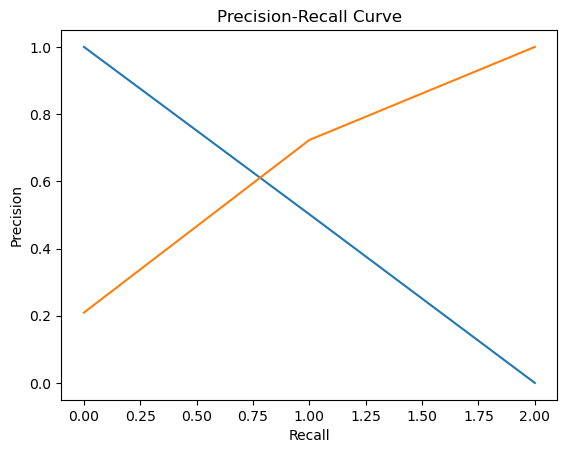

In [35]:

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot the precision-recall curve
plt.plot(recall)
plt.plot(precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Decision Tree using XGBoost

In [36]:


# Define the parameters for the decision tree
params = {
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    
}
# Create the XGBoost decision tree model with the defined parameters
model = xgb.XGBClassifier(**params)

# Train the model on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

# Calculate accuracy, F1 score, precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy: {:.2f}%".format(accuracy * 100.0))
print("F1 score: {:.2f}%".format(f1 * 100.0))
print("Precision: {:.2f}%".format(precision * 100.0))
print("Recall: {:.2f}%".format(recall * 100.0))
print("Confusion matrix: \n", conf)


Accuracy: 85.42%
F1 score: 58.28%
Precision: 72.69%
Recall: 48.63%
Confusion matrix: 
 [[26252  1334]
 [ 3751  3551]]
